In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('rest_one_hot_encode.csv')

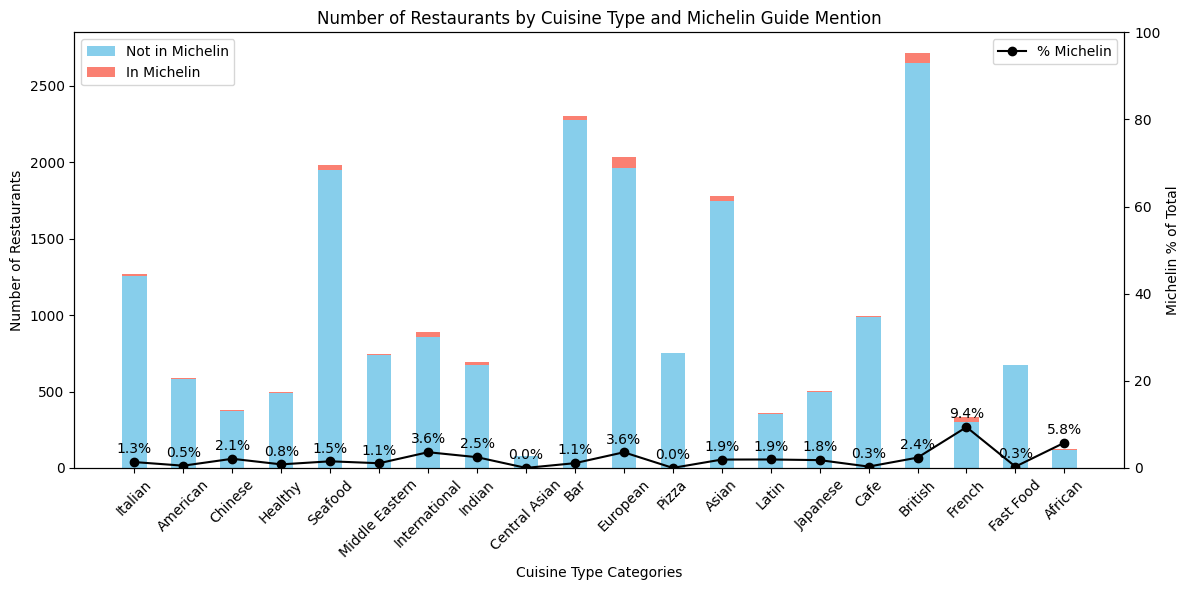

In [11]:
import matplotlib.pyplot as plt

cuisine_type_columns = data.columns[17:37] # Выбор столбцов с 17 по 36 (cuisine types)

cuisine_type_counts = data[cuisine_type_columns].sum() # Подсчёт количества ресторанов по cuisine type

# Подсчёт количества ресторанов с упоминанием в Michelin
michelin_counts = data[data['IsIn_MICHELIN_Guide'] == 1][cuisine_type_columns].sum()
non_michelin_counts = data[data['IsIn_MICHELIN_Guide'] == 0][cuisine_type_columns].sum()

percentage_michelin = (michelin_counts / cuisine_type_counts * 100).fillna(0) # Расчёт процентного соотношения Michelin к общему количеству ресторанов
categories = cuisine_type_columns.tolist()# Метки для оси X

fig, ax1 = plt.subplots(figsize=(12, 6))
bar_width = 0.5

# Столбчатая диаграмма (Michelin / не Michelin)
ax1.bar(categories, non_michelin_counts, color='skyblue', label='Not in Michelin', width=bar_width)
ax1.bar(categories, michelin_counts, bottom=non_michelin_counts, color='salmon', label='In Michelin', width=bar_width)

ax1.set_xlabel('Cuisine Type Categories')
ax1.set_ylabel('Number of Restaurants')
ax1.set_title('Number of Restaurants by Cuisine Type and Michelin Guide Mention')
ax1.set_xticks(range(len(categories)))
ax1.set_xticklabels(categories, rotation=45)
ax1.legend(loc='upper left')

# Вторая ось Y для процентного соотношения
ax2 = ax1.twinx()
ax2.plot(categories, percentage_michelin, color='black', marker='o', linestyle='-', label='% Michelin')
ax2.set_ylabel('Michelin % of Total')
ax2.set_ylim(0, 100)  # Проценты от 0 до 100
ax2.legend(loc='upper right')

# Подписи на точках перелома
for i, txt in enumerate(percentage_michelin):
    ax2.text(i, txt + 2, f'{txt:.1f}%', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()
